![Screenshot from 2023-09-02 19-22-44.png](<attachment:Screenshot from 2023-09-02 19-22-44.png>)
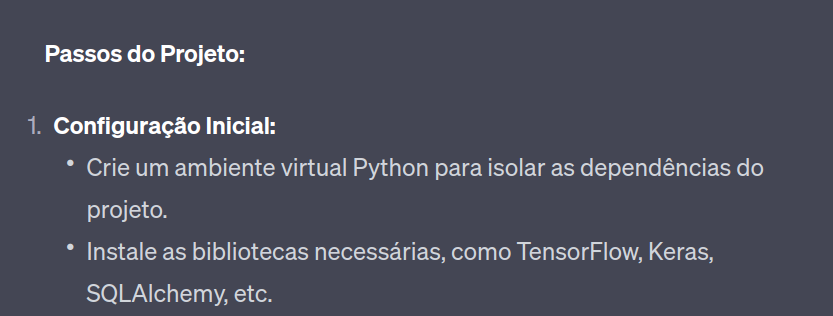

In [7]:
!cat setup/setup.py

# cmd1 = virtualenv env
# cmd2 = source env/bin/activate
# cmd3 = pip install -r pre-requirements.txt
# cmd4 = pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
# cmd5 = sudo apt-get install --reinstall libxcb-xinerama0
# cmd6 = sudo apt-get install texlive-latex-extra
# cmd7 = pip install -r requirements.txt

# e está pronto o amviente chamado de env 

# para rodar com py
# import os
# os.system(cmd)

![Screenshot from 2023-09-02 19-23-00.png](<attachment:Screenshot from 2023-09-02 19-23-00.png>)
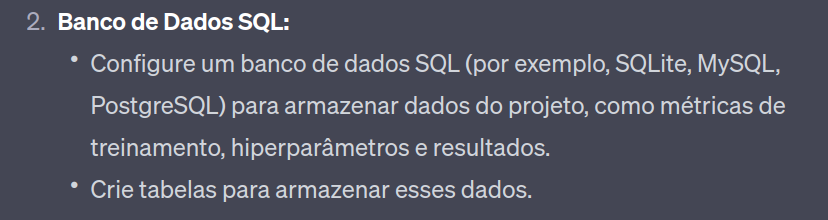

In [20]:
#!pip install psycopg2
!pip install psycopg2-binary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [21]:
'''postgreSQL'''
import psycopg2
import numpy as np
from tensorflow.keras.datasets import mnist

# Conectando ao banco de dados PostgreSQL
try:
    conn = psycopg2.connect(
        dbname="seu_banco_de_dados",
        user="seu_usuario",
        password="sua_senha",
        host="localhost"
    )
    cursor = conn.cursor()
except psycopg2.Error as e:
    print("Erro ao conectar ao PostgreSQL:", e)
    exit()

# Criando uma tabela para armazenar os dados MNIST
create_table_query = """
CREATE TABLE mnist_data (
    id serial PRIMARY KEY,
    label integer,
    image_data bytea
);
"""
try:
    cursor.execute(create_table_query)
    conn.commit()
    print("Tabela criada com sucesso.")
except psycopg2.Error as e:
    print("Erro ao criar a tabela:", e)
    conn.rollback()
    exit()

# Carregando os dados MNIST
(train_images, train_labels), (_, _) = mnist.load_data()

# Inserindo 100 exemplos de dados na tabela
num_examples = 100
for i in range(num_examples):
    label = int(train_labels[i])
    image_data = psycopg2.Binary(np.array(train_images[i]).tobytes())

    insert_query = "INSERT INTO mnist_data (label, image_data) VALUES (%s, %s);"
    data_to_insert = (label, image_data)

    try:
        cursor.execute(insert_query, data_to_insert)
        conn.commit()
    except psycopg2.Error as e:
        print(f"Erro ao inserir exemplo {i}: {e}")
        conn.rollback()

# Fechando a conexão com o banco de dados
cursor.close()
conn.close()

print(f"{num_examples} exemplos de dados MNIST inseridos no banco de dados.")


ImportError: /home/v/Desktop/MLOPS/env/lib/python3.10/site-packages/tensorflow/python/../libtensorflow_cc.so.2: undefined symbol: _ZN6google8protobuf7Message19CopyWithSourceCheckERS1_RKS1_

In [17]:
''' CRIANDO BANCO COM SPARK'''
from pyspark.sql import SparkSession

# Inicialize a sessão Spark
spark = SparkSession.builder.appName("SparkToDatabase").getOrCreate()

# Leia os dados de uma fonte externa (por exemplo, um arquivo CSV)
data = spark.read.csv("seu_arquivo.csv", header=True, inferSchema=True)

# Realize transformações nos dados, se necessário
# data = data.select("coluna1", "coluna2").filter(data["coluna1"] > 10)

# Escreva os dados transformados no banco de dados SQLite
# Substitua 'jdbc:sqlite:seu_banco.db' pelo caminho para o seu banco de dados SQLite
database_url = "jdbc:sqlite:seu_banco.db"
table_name = "nome_da_tabela"

data.write \
    .format("jdbc") \
    .option("url", database_url) \
    .option("dbtable", table_name) \
    .save()

# Encerre a sessão Spark
spark.stop()



JAVA_HOME is not set


RuntimeError: Java gateway process exited before sending its port number

In [2]:
'''sqlite'''
import sqlite3
import numpy as np
from tensorflow.keras.datasets import mnist

# Carregue o conjunto de dados MNIST
(x_train, y_train), _ = mnist.load_data()

# Selecione o número de amostras que deseja incluir no banco de dados
num_samples = 10  # Altere este valor conforme necessário

# Conecte-se ao banco de dados SQLite
conn = sqlite3.connect('mnist_small_database.db')
cursor = conn.cursor()

# Crie uma tabela para armazenar os dados MNIST
create_table_query = """
CREATE TABLE mnist_data (
    id INT AUTO_INCREMENT PRIMARY KEY,
    image BLOB,
    label INT
)
"""

cursor.execute(create_table_query)
conn.commit()

# Insira as amostras selecionadas na tabela do banco de dados
for i in range(num_samples):
    image_data = x_train[i].tobytes()
    label = y_train[i]
    
    insert_query = "INSERT INTO mnist_data (image, label) VALUES (?, ?)"
    cursor.execute(insert_query, (sqlite3.Binary(image_data), label))

conn.commit()

# Feche a conexão com o banco de dados
conn.close()


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

# Mostra 1 exemplo do dado

In [8]:
''' SQL'''
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

# Conecte-se ao banco de dados SQLite
conn = sqlite3.connect('mnist_database.db')
cursor = conn.cursor()

cursor.execute("SELECT image, label FROM mnist_data ORDER BY RANDOM() LIMIT 1")
sample = cursor.fetchone()

# Selecione algumas amostras aleatórias do banco de dados


#cursor.execute("SELECT image, label FROM mnist_data ORDER BY RANDOM() LIMIT 5")

# Função para exibir imagens MNIST com etiquetas
def show_images(samples):
    for sample in samples:
        image = np.frombuffer(sample[0], dtype=np.uint8).reshape(28, 28)
        label = sample[1]
        
        plt.figure()
        plt.title(f"Label: {label}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

# Exiba as amostras selecionadas
show_images([sample])
#show_images(samples)

# Feche a conexão com o banco de dados
conn.close()


#### mysql

In [13]:
import mysql.connector
import numpy as np
from tensorflow.keras.datasets import mnist

# Conecte-se ao servidor MySQL (certifique-se de fornecer as informações corretas)
db_connection = mysql.connector.connect(
    host="localhost",  # Host do servidor MySQL
    user="seu_usuario",  # Nome de usuário
    password="sua_senha",  # Senha
    database="mnist_database"  # Nome do banco de dados
)

# Crie uma tabela para armazenar os dados MNIST
cursor = db_connection.cursor()

create_table_query = """
CREATE TABLE mnist_data (
    id INT AUTO_INCREMENT PRIMARY KEY,
    image BLOB,
    label INT
)
"""

cursor.execute(create_table_query)
db_connection.commit()

# Carregue os dados do toy model MNIST
(x_train, y_train), _ = mnist.load_data()

# Insira os dados MNIST na tabela do banco de dados
for i in range(len(x_train)):
    image_data = x_train[i].tobytes()
    label = y_train[i]
    
    insert_query = "INSERT INTO mnist_data (image, label) VALUES (%s, %s)"
    cursor.execute(insert_query, (image_data, label))

    if i % 1000 == 0:
        db_connection.commit()

# Certifique-se de finalizar as transações e fechar a conexão com o banco de dados
db_connection.commit()
cursor.close()
db_connection.close()


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [12]:
#!pip uninstall protobuf -y
#pip install protobuf==x.y.z
!pip install protobuf==3.20.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
mysql-connector-python 8.1.0 requires protobuf<=4.21.12,>=4.21.1, but you have protobuf 3.20.0 which is incompatible.


In [6]:
#!pip install pyspark
#!pip install mysql-connector-python
# !pip install --upgrade protobuf
# import tensorflow as tf
# print(tf.__version__)

!pip show protobuf


Name: protobuf
Version: 4.24.2
Summary: 
Home-page: https://developers.google.com/protocol-buffers/
Author: protobuf@googlegroups.com
Author-email: protobuf@googlegroups.com
License: 3-Clause BSD License
Location: /home/v/Desktop/MLOPS/env/lib/python3.10/site-packages
Requires: 
Required-by: mysql-connector-python, tensorboard, tensorflow


In [3]:
'''SPARK'''
from pyspark.sql import SparkSession

# Configuração da sessão Spark
spark = SparkSession.builder.appName("example").getOrCreate()

# Crie um DataFrame Spark que representa a tabela do banco de dados
# Substitua 'jdbc:sqlite:your_database.db' pelo caminho para o seu banco de dados SQLite
database_url = "jdbc:sqlite:your_database.db"
table_name = "mnist_data"

df = spark.read \
    .format("jdbc") \
    .option("url", database_url) \
    .option("dbtable", table_name) \
    .load()

# Execute uma consulta SQL no DataFrame para buscar dados
df.show()


JAVA_HOME is not set


RuntimeError: Java gateway process exited before sending its port number

In [14]:
import tensorflow as tf
print(tf.__version__)

import tensorflow.keras as keras
print(keras.__version__)


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [15]:
# !pip install tensorflow==2.4.0
#!pip install --upgrade protobuf
!pip install --upgrade tensorflow



  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.7 MB/s eta 0:00:000m eta 0:00:010:00:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 KB 10.2 MB/s eta 0:00:00m eta 0:00:01
  Using cached protobuf-4.24.2-cp37-abi3-manylinux2014_x86_64.whl (311 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  A

![Screenshot from 2023-09-02 19-23-09.png](<attachment:Screenshot from 2023-09-02 19-23-09.png>)
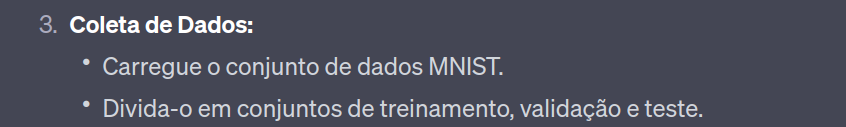

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Carregue o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização dos pixels (escala entre 0 e 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Divisão dos dados em conjuntos de treinamento, validação e teste
# 80% treinamento, 10% validação, 10% teste
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

# Verificar as dimensões dos conjuntos de dados
print("Dimensões dos conjuntos de dados:")
print("Conjunto de Treinamento (x_train, y_train):", x_train.shape, y_train.shape)
print("Conjunto de Validação (x_val, y_val):", x_val.shape, y_val.shape)
print("Conjunto de Teste (x_test, y_test):", x_test.shape, y_test.shape)


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

![Screenshot from 2023-09-02 19-23-18.png](<attachment:Screenshot from 2023-09-02 19-23-18.png>)
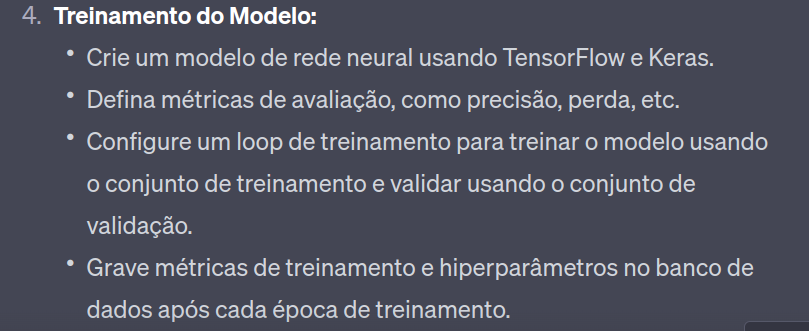

![Screenshot from 2023-09-02 19-23-25.png](<attachment:Screenshot from 2023-09-02 19-23-25.png>)
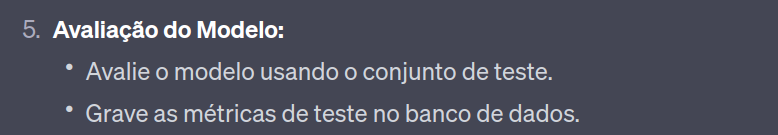

![Screenshot from 2023-09-02 19-23-31.png](<attachment:Screenshot from 2023-09-02 19-23-31.png>)
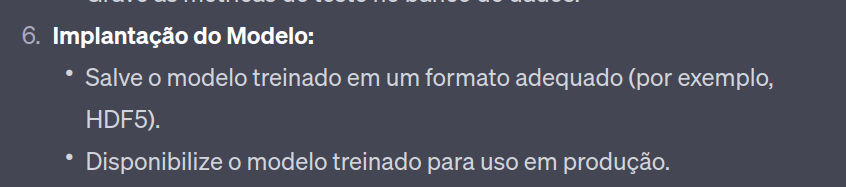